# Chronic Kidney Disease Prediction

In [2]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from pandas_profiling import ProfileReport 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif # use this for classification tasks
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline


In [3]:
# load the data
df = pd.read_csv('kidney_disease.csv')
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


# Data Pre-processing

In [4]:
#exploration data shape 
df.shape

(400, 26)

In [5]:
df.columns.values

array(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
       'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn',
       'dm', 'cad', 'appet', 'pe', 'ane', 'classification'], dtype=object)

In [6]:
df.drop('id', axis=1, inplace=True)

# Data contains

1. age - age
2. bp - blood pressure
3. sg - specific gravity
4. al - albumin
5. su - sugar
6. rbc - red blood cells
7. pc - pus cell
8. pcc - pus cell clumps
9. ba - bacteria
10. bgr - blood glucose random
11. bu - blood urea
12. sc - serum creatinine
13. sod - sodium
14. pot - potassium
15. hemo - haemoglobin
16. pcv - packed cell volume
17. wc - white blood cell count
18. rc - red blood cell count
19. htn - hypertension
20. dm - diabetes mellitus
21. cad - coronary artery disease
22. appet - appetite
23. pe - pedal edema
24. ane - anemia
25. lassification - class

# Feature description

1. Age(numerical) --> age in years
2. Blood Pressure(numerical) bp in mm/Hg
3. Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025)
4. Albumin(nominal)al - (0,1,2,3,4,5)
5. Sugar(nominal) su - (0,1,2,3,4,5)
6. Red Blood Cells(nominal) rbc - (normal,abnormal)
7. Pus Cell (nominal)pc - (normal,abnormal)
8. Pus Cell clumps(nominal)pcc - (present,notpresent)
9. Bacteria(nominal) ba - (present,notpresent)
10. Blood Glucose Random(numerical) bgr in mgs/dl
11. Blood Urea(numerical) bu in mgs/dl
12. Serum Creatinine(numerical) sc in mgs/dl
13. Sodium(numerical) sod in mEq/L
14. Potassium(numerical) pot in mEq/L
15. Haemoglobin(numerical) hemo in gms
16. Packed Cell Volume(numerical)
17. White Blood Cell Count(numerical) wc in cells/cumm
18. Red Blood Cell Count(numerical) rc in millions/cmm
19. Hypertension(nominal) htn - (yes,no)
20. Diabetes Mellitus(nominal) dm - (yes,no)
21. Coronary Artery Disease(nominal) cad - (yes,no)
22. Appetite(nominal) ppet - (good,poor)
23. Pedal Edema(nominal) pe - (yes,no)
24. Anemia(nominal)ane - (yes,no)
25. Class (nominal) class - (ckd,notckd)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [8]:
df.head().T

,0,1,2,3,4
age,48,7,62,48,51
bp,80,50,80,70,80
sg,1.02,1.02,1.01,1.005,1.01
al,1,4,2,4,2
su,0,0,3,0,0
rbc,NaN,NaN,normal,normal,normal
pc,normal,normal,normal,abnormal,normal
pcc,notpresent,notpresent,notpresent,present,notpresent
ba,notpresent,notpresent,notpresent,notpresent,notpresent
bgr,121,NaN,423,117,106


In [10]:
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})

In [11]:
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'normal':0,'abnormal':1})

In [12]:
df[['ba','pcc']] = df[['ba','pcc']].replace(to_replace={'notpresent':0,'present':1})

In [13]:
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})

In [14]:
df["classification"] = [1 if i == "ckd" else 0 for i in df["classification"]]

In [16]:
df.head().T


,0,1,2,3,4
age,48,7,62,48,51
bp,80,50,80,70,80
sg,1.02,1.02,1.01,1.005,1.01
al,1,4,2,4,2
su,0,0,3,0,0
rbc,NaN,NaN,0,0,0
pc,0,0,0,1,0
pcc,0,0,0,1,0
ba,0,0,0,0,0
bgr,121,NaN,423,117,106


In [17]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn               float64
dm                 object
cad                object
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [20]:
df.pcv = pd.to_numeric(df.pcv, errors='coerce')
df.pc = pd.to_numeric(df.pc, errors='coerce')
df.dm = pd.to_numeric(df.dm, errors='coerce')
df.cad = pd.to_numeric(df.cad, errors='coerce')
df.wc = pd.to_numeric(df.wc, errors='coerce')
df.rc = pd.to_numeric(df.rc, errors='coerce')


In [21]:
#describe data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
rbc,248.0,0.189516,0.392711,0.000,0.00,0.00,0.00,1.000
pc,335.0,0.226866,0.419431,0.000,0.00,0.00,0.00,1.000
pcc,396.0,0.106061,0.308305,0.000,0.00,0.00,0.00,1.000
ba,396.0,0.055556,0.229351,0.000,0.00,0.00,0.00,1.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000


In [22]:
sum(df.duplicated())

0

In [23]:
df.isna().sum().sort_values()

classification      0
pe                  1
appet               1
ane                 1
htn                 2
cad                 4
pcc                 4
ba                  4
dm                  8
age                 9
bp                 12
sc                 17
bu                 19
bgr                44
al                 46
sg                 47
su                 49
hemo               52
pc                 65
pcv                71
sod                87
pot                88
wc                106
rc                131
rbc               152
dtype: int64

<AxesSubplot:>

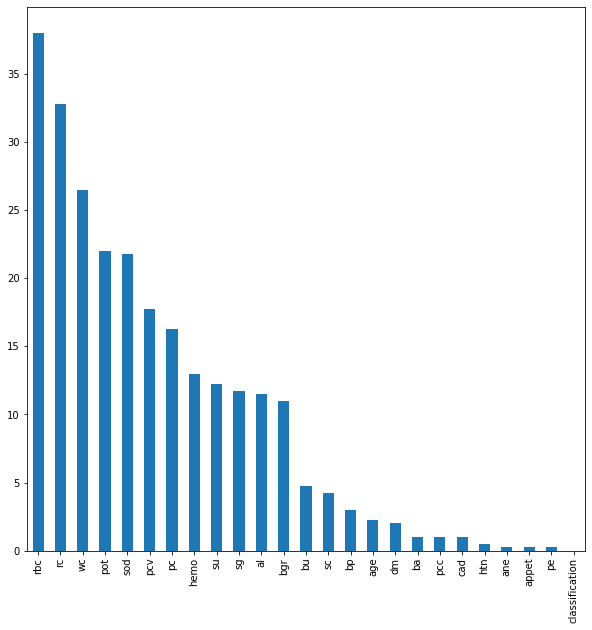

In [24]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False).plot(kind='bar', figsize=(10,10))

## Exploratory data analysis

In [25]:
plt.style.use("seaborn-dark-palette")

C:\Users\chaml\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


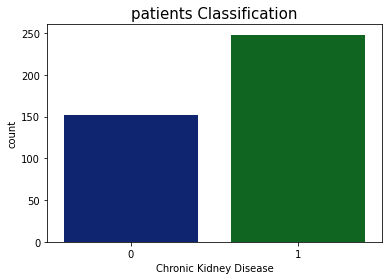

In [26]:
sns.countplot(df.classification)
plt.xlabel('Chronic Kidney Disease')
plt.title("patients Classification",fontsize=15)
plt.show()

C:\Users\chaml\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\chaml\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


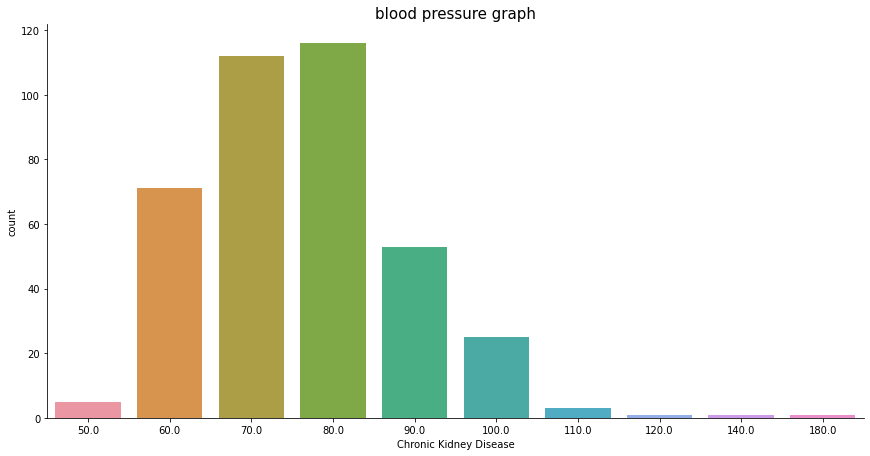

In [27]:
# blood pressure graph
sns.factorplot(data=df, x='bp', kind= 'count',size=6,aspect=2)
plt.xlabel('Chronic Kidney Disease')
plt.title("blood pressure graph",fontsize=15)
plt.show()


C:\Users\chaml\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\chaml\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


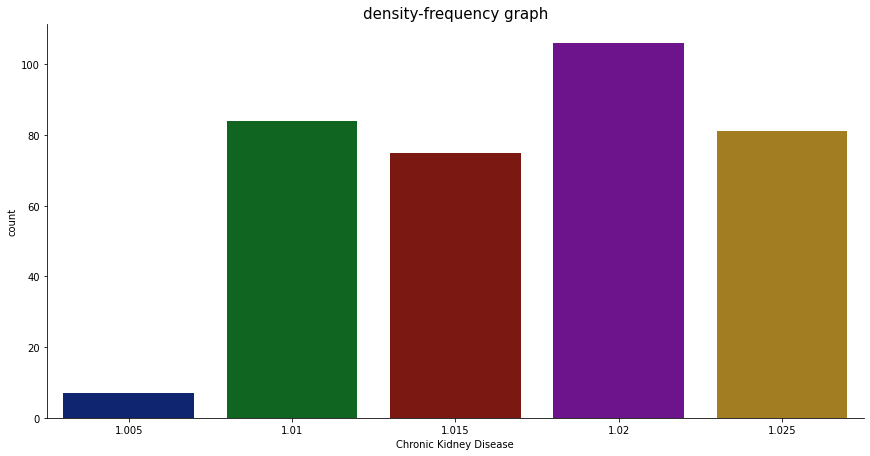

In [28]:
#density-frequency graph

sns.factorplot(data=df, x='sg', kind= 'count',size=6,aspect=2)
plt.xlabel('Chronic Kidney Disease')
plt.title("density-frequency graph",fontsize=15)
plt.show()

C:\Users\chaml\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\chaml\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


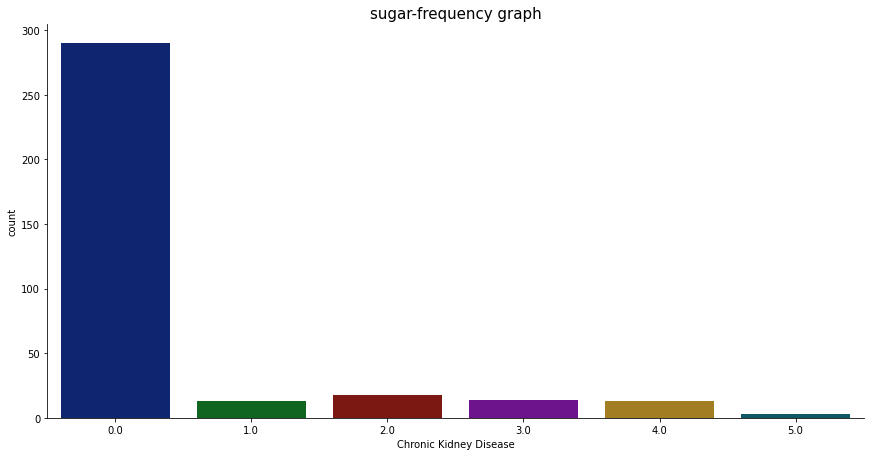

In [29]:
#sugar-frequency graph
sns.factorplot(data=df, x='su', kind= 'count',size=6,aspect=2)
plt.xlabel('Chronic Kidney Disease')
plt.title("sugar-frequency graph",fontsize=15)
plt.show()

C:\Users\chaml\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


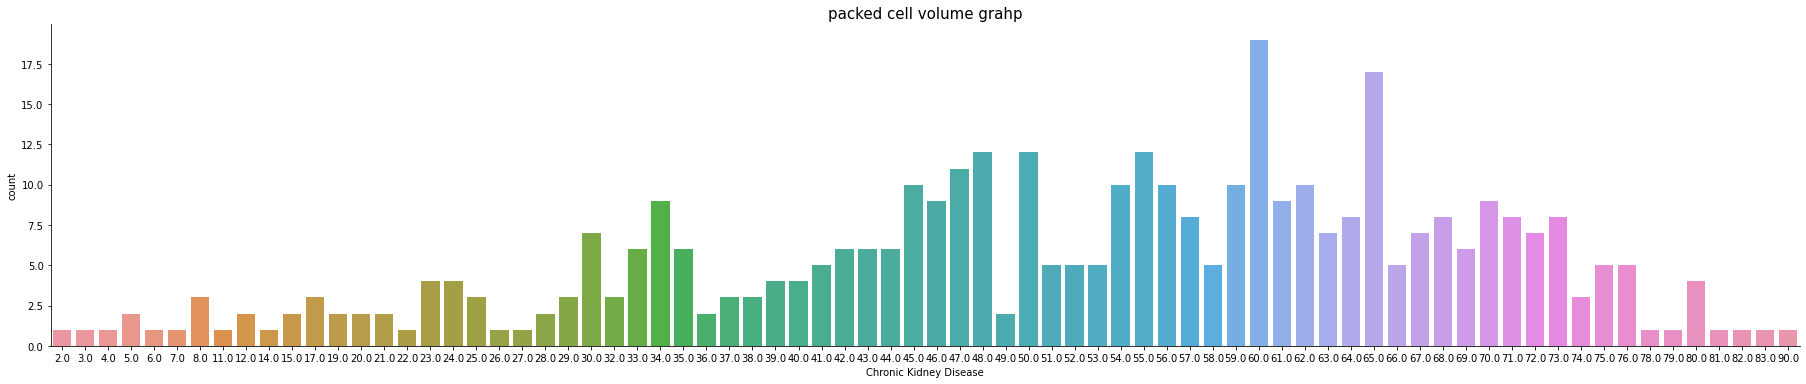

In [30]:
# packed cell volume grahp
sns.factorplot(data=df, x='age', kind= 'count',aspect=5)
plt.xlabel('Chronic Kidney Disease')
plt.title("packed cell volume grahp",fontsize=15)
plt.show()

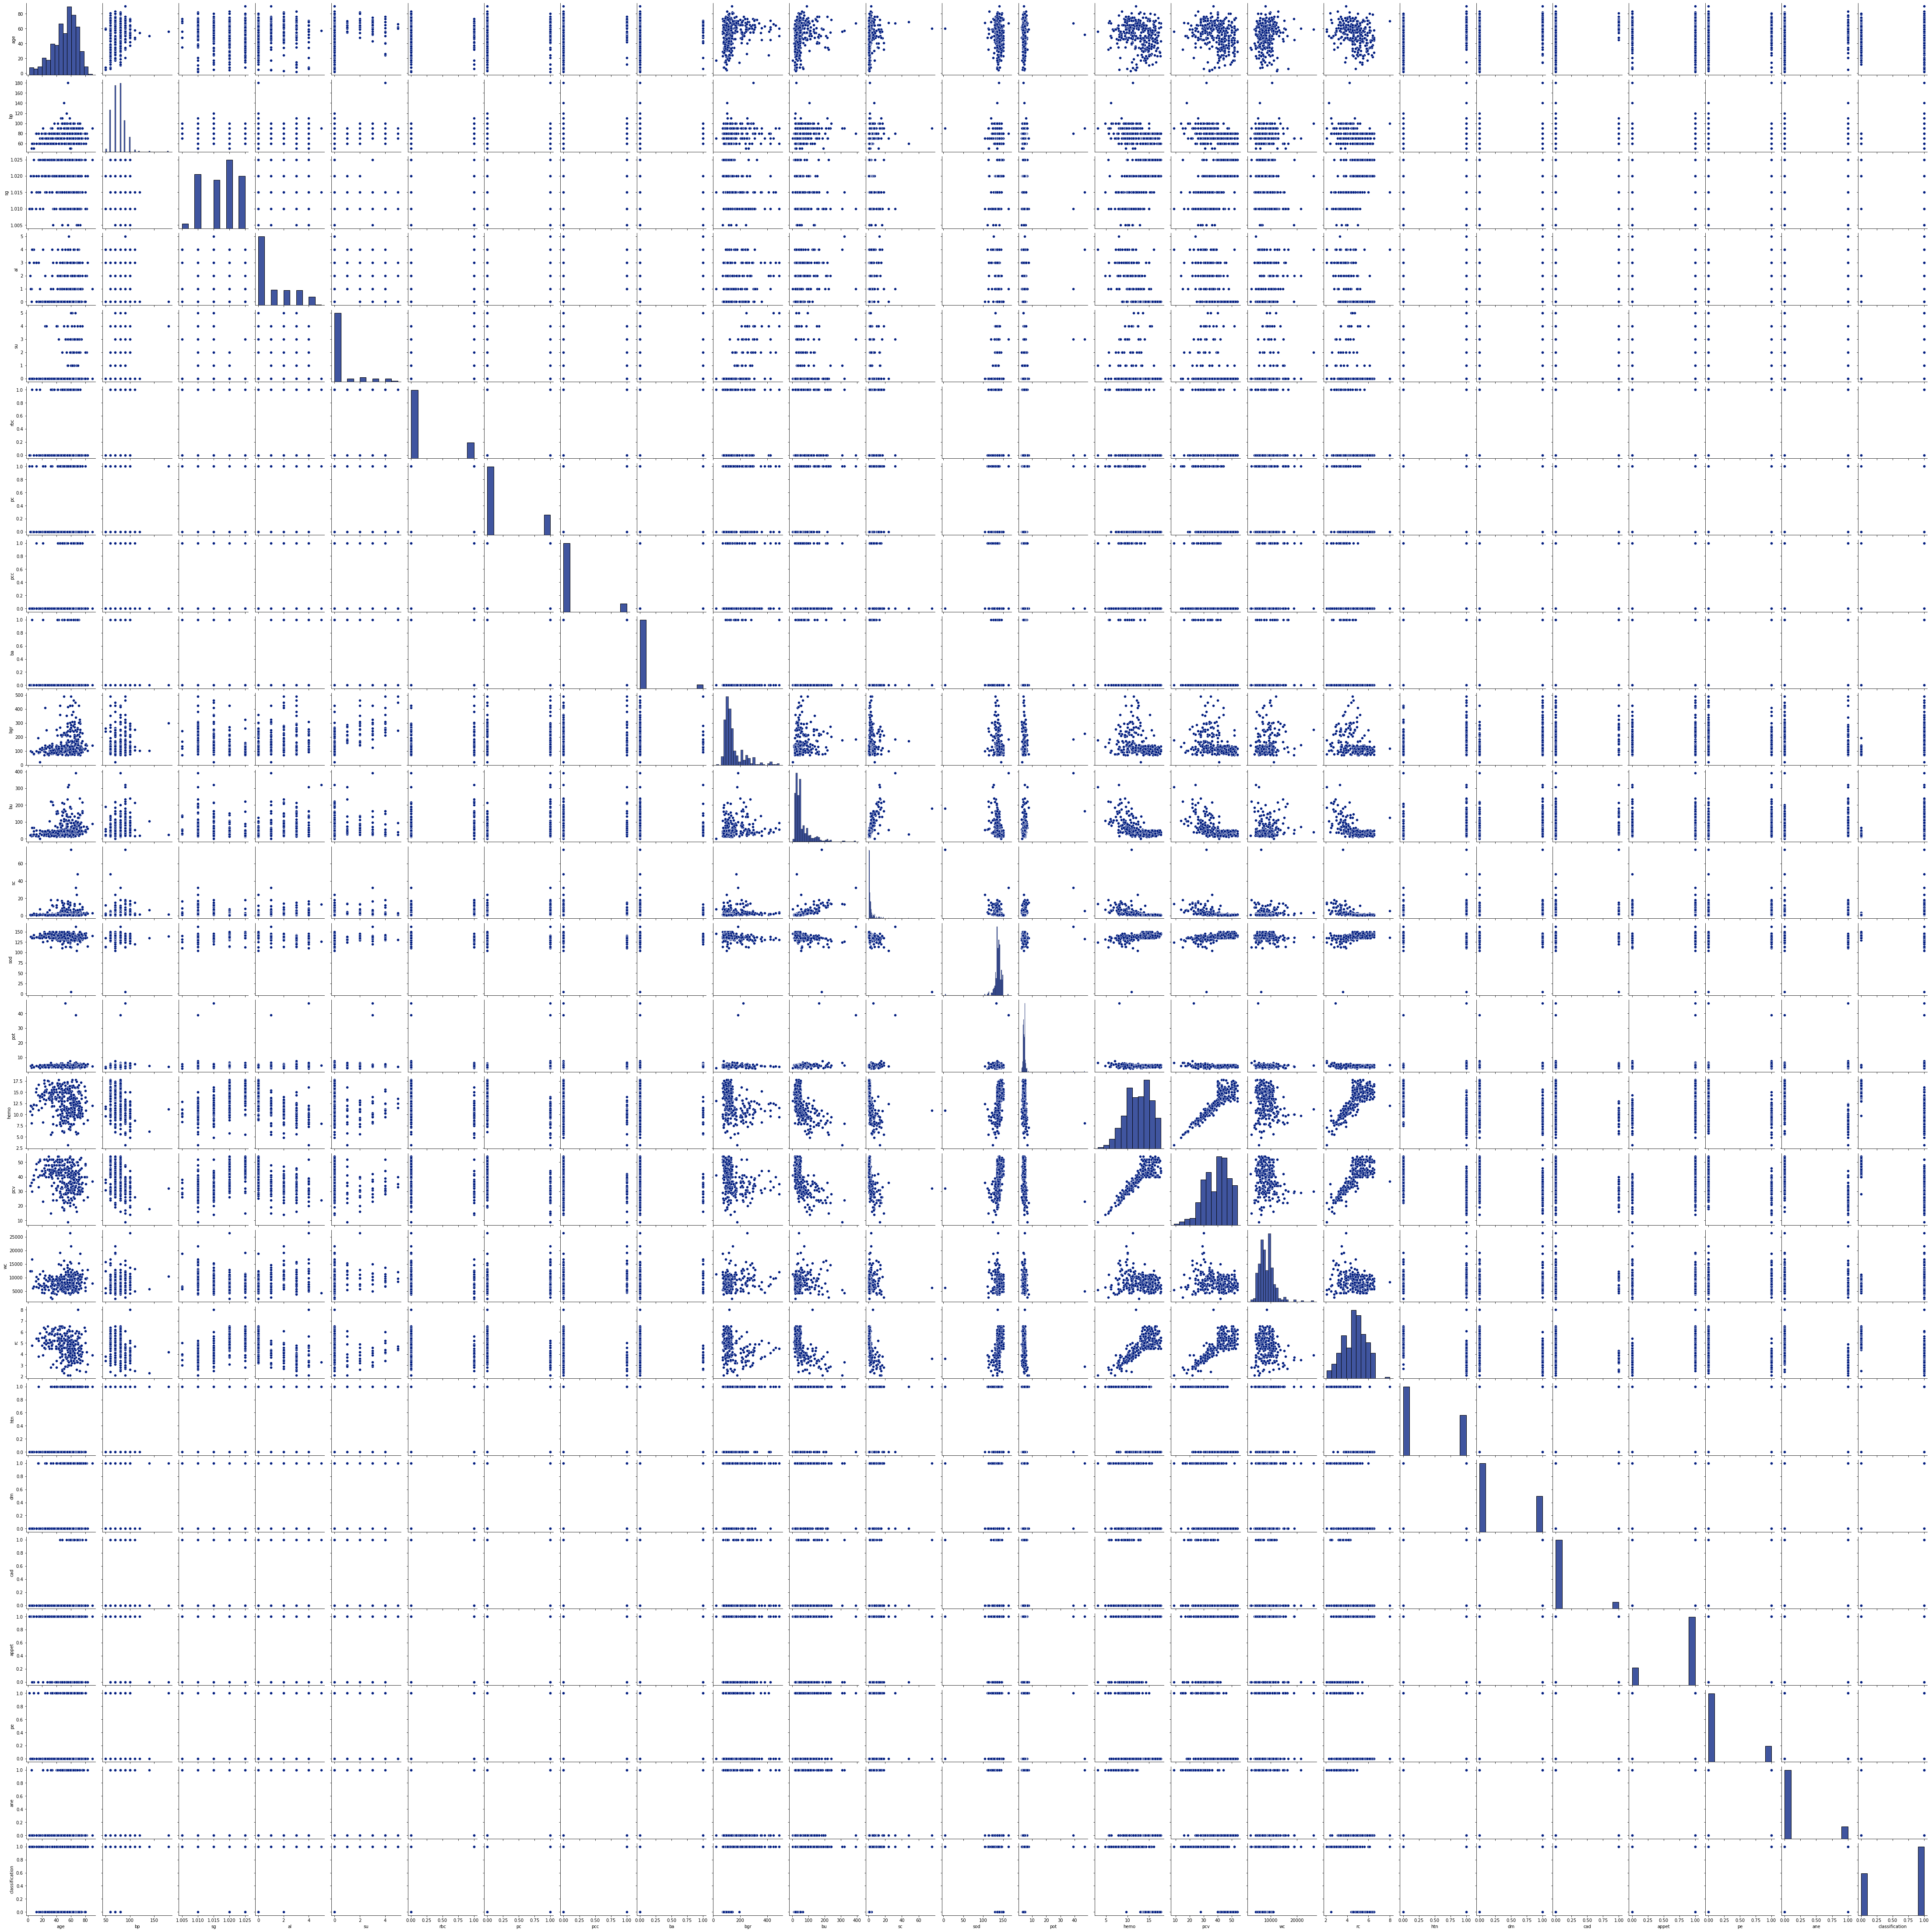

In [31]:
sns.pairplot(df)

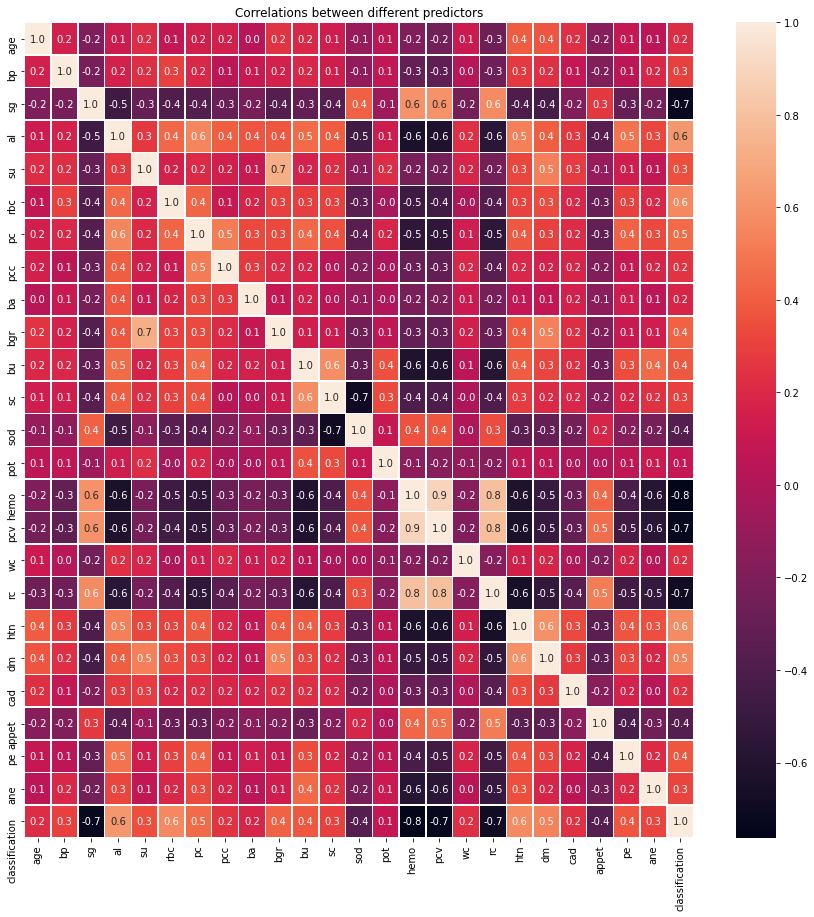

In [32]:
#correlation map
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlations between different predictors')
plt.show()

In [33]:
df2 = df.dropna(axis = 0)
print(f"Before dropping all NaN values: {df.shape}")
print(f"After dropping all NaN values: {df2.shape}")

Before dropping all NaN values: (400, 25)
After dropping all NaN values: (158, 25)


In [35]:
df2.head().T

,3,9,11,14,20
age,48.000,53.00,63.00,68.00,61.000
bp,70.000,90.00,70.00,80.00,80.000
sg,1.005,1.02,1.01,1.01,1.015
al,4.000,2.00,3.00,3.00,2.000
su,0.000,0.00,0.00,2.00,0.000
rbc,0.000,1.00,1.00,0.00,1.000
pc,1.000,1.00,1.00,1.00,1.000
pcc,1.000,1.00,1.00,1.00,0.000
ba,0.000,0.00,0.00,1.00,0.000
bgr,117.000,70.00,380.00,157.00,173.000


In [36]:
X = df2.drop(['classification', 'sg', 'appet', 'rc', 'pcv', 'hemo', 'sod'], axis = 1)
y = df2['classification']

In [37]:
X.columns

Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'pot', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane'],
      dtype='object')

##  Splitting into Test and training data 

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Model selection

In [52]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [53]:
from sklearn.model_selection import GridSearchCV
scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
score_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
score_df

,model,best_score,best_params
0,svm,0.981048,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.993750,{'n_estimators': 5}
2,logistic_regression,0.975000,{'C': 1}


In [49]:
model = RandomForestClassifier(n_estimators=5)
model.fit(X_train, y_train)
print('RandomForestClassifierModel Train Score is : ' , model.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , model.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  1.0
RandomForestClassifierModel Test Score is :  1.0


In [46]:
#Calculating Prediction
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for RandomForestClassifierModel is :  [0 0 0 0 0 1 0 0 0 0]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


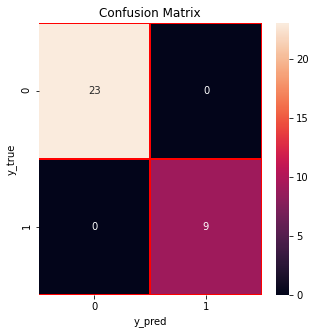

In [47]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=RandomForestClassifierModel.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Confusion Matrix")
plt.show()

## Save the model

In [41]:
# Saving the model
import joblib
joblib.dump(RandomForestClassifierModel, 'model_kidney')

['model_kidney']